In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

# Sparse Results

In [2]:
df_sparse_results = pd.read_pickle(r"../Results/simulation_results_sparse_noisyV1.pkl")

In [3]:
results = df_sparse_results[['Model', 'SNRlevel', 'SINR']].groupby(['Model', 'SNRlevel']).agg({'SNRlevel':'size', 'SINR':'mean'}).rename(columns={'SNRlevel':'count','SINR':'SINR'}).reset_index()
# results

table = pd.DataFrame(columns = (["SNRlevel"] + list(df_sparse_results['Model'].unique())))
table['SNRlevel'] = list(results['SNRlevel'].unique())
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table = table.iloc[::-1]
table

,SNRlevel,WSM,LDMI,PMF
4,30,26.489377,30.059534,30.124590
3,25,23.258869,25.202256,25.234122
2,20,17.984060,19.600110,19.612067
1,15,10.960966,15.177152,15.200747
0,10,4.947468,10.379371,10.420576


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


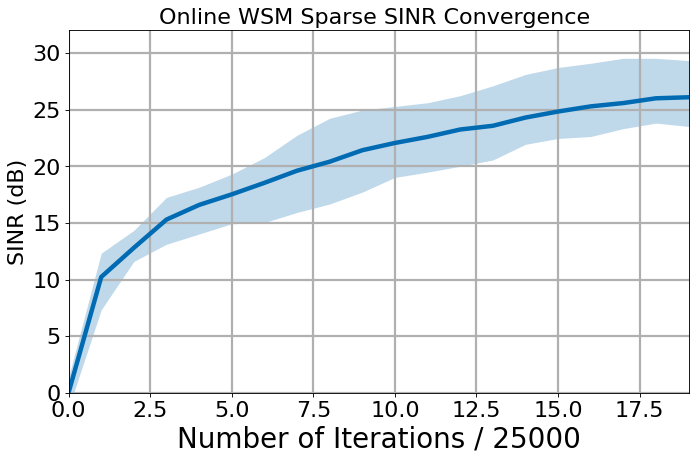

In [4]:
data = np.stack(df_sparse_results.loc[(df_sparse_results['SNRlevel'] == 30) & (df_sparse_results['Model'] == "WSM")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians, 25/75 percentiles, and standard deviation
med, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, med.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, med, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online WSM Sparse SINR Convergence ")
plt.axis([0.0,19.0,-0,32])
ApplyFont(plt.gca())

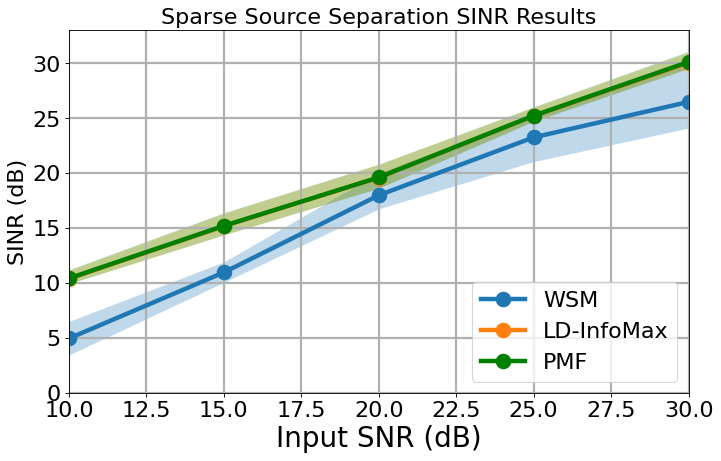

In [5]:
df_sparse_results = df_sparse_results.iloc[:df_sparse_results.shape[0] - np.mod(df_sparse_results.shape[0], 15)]
results = df_sparse_results[['Model', 'SNRlevel', 'SINR']].groupby(['Model', 'SNRlevel']).agg({'SNRlevel':'size', 'SINR':'mean'}).rename(columns={'SNRlevel':'count','SINR':'SINR'}).reset_index()

SINRWSM = (results.loc[(results['Model'] == 'WSM')]['SINR'].to_numpy())
SINRLDMI = (results.loc[(results['Model'] == 'LDMI')]['SINR'].to_numpy())
SINRPMF = (results.loc[(results['Model'] == 'PMF')]['SINR'].to_numpy())
SNRinp = (np.array([10, 15, 20, 25, 30]))

dataWSM = df_sparse_results.loc[(df_sparse_results['Model'] == 'WSM')]['SINR'].to_numpy().reshape(df_sparse_results.shape[0]//(15),-1)
dataLDMI = df_sparse_results.loc[(df_sparse_results['Model'] == 'LDMI')]['SINR'].to_numpy().reshape(df_sparse_results.shape[0]//(15),-1)
dataPMF = df_sparse_results.loc[(df_sparse_results['Model'] == 'PMF')]['SINR'].to_numpy().reshape(df_sparse_results.shape[0]//(15),-1)

meanWSM, perc_25WSM, perc_75WSM, stdCorInfo = perc(dataWSM)
perc_25WSM = np.flipud(perc_25WSM)
perc_75WSM = np.flipud(perc_75WSM)

meanLDMI, perc_25LDMI, perc_75LDMI, stdLDMI = perc(dataLDMI)
perc_25LDMI= np.flipud(perc_25LDMI)
perc_75LDMI = np.flipud(perc_75LDMI)

meanPMF, perc_25PMF, perc_75PMF, stdPMF = perc(dataPMF)
perc_25PMF= np.flipud(perc_25PMF)
perc_75PMF = np.flipud(perc_75PMF)

fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(SNRinp,SINRWSM,"-o", linewidth=4, markersize = 13, label = "WSM")
plt.fill_between(SNRinp, perc_25WSM, perc_75WSM, alpha=0.25, linewidth=0, color='#006BB2')

plt.plot(SNRinp,SINRLDMI,"-o", linewidth=4, markersize = 13, label = 'LD-InfoMax')
plt.fill_between(SNRinp, perc_25LDMI, perc_75LDMI, alpha=0.25, linewidth=0, color='orange')

plt.plot(SNRinp,SINRPMF,"-o", linewidth=4, markersize = 13, color='green', label = 'PMF')
plt.fill_between(SNRinp, perc_25PMF, perc_75PMF, alpha=0.25, linewidth=0, color='green')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Input SNR (dB)",fontsize=25)
plt.axis([9.99,30,-0,33])
plt.legend(loc='lower right',fontsize=20)
plt.title('Sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())

# Nonnegative Sparse Results

In [6]:
df_nnsparse_results = pd.read_pickle(r"../Results/simulation_results_nnsparse_noisyV1.pkl")

In [7]:
results = df_nnsparse_results[['Model', 'SNRlevel', 'SINR']].groupby(['Model', 'SNRlevel']).agg({'SNRlevel':'size', 'SINR':'mean'}).rename(columns={'SNRlevel':'count','SINR':'SINR'}).reset_index()
# results
table = pd.DataFrame(columns = (["SNRlevel"] + list(df_nnsparse_results['Model'].unique())))
table['SNRlevel'] = list(results['SNRlevel'].unique())
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table = table.iloc[::-1]
table

,SNRlevel,WSM,LDMI
4,30,25.159652,29.134043
3,25,21.561283,22.246298
2,20,18.230954,16.783214
1,15,11.896138,13.219113
0,10,8.040680,9.328087


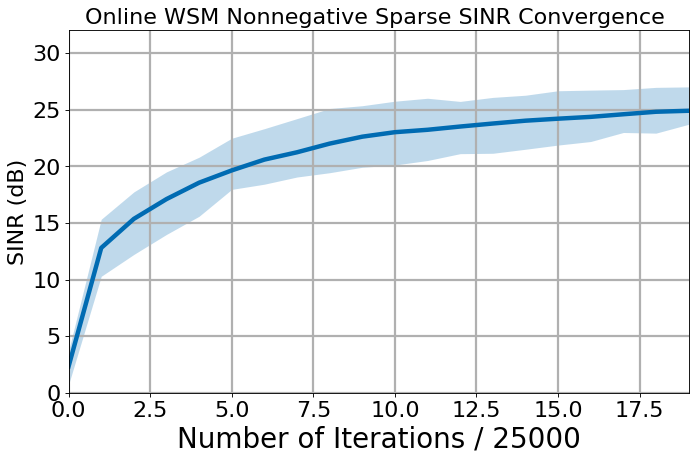

In [8]:
data = np.stack(df_nnsparse_results.loc[(df_nnsparse_results['SNRlevel'] == 30) & (df_nnsparse_results['Model'] == "WSM")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians and 25/75 percentiles
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, mean_.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online WSM Nonnegative Sparse SINR Convergence ")
plt.axis([0.0,19.0,-0,32])
ApplyFont(plt.gca())

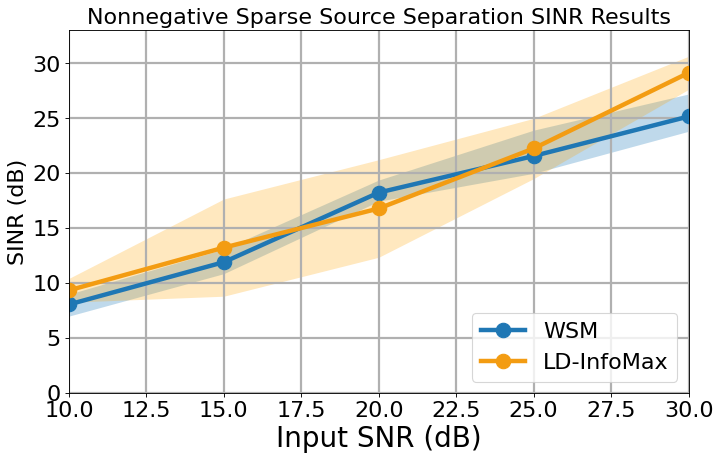

In [9]:

df_nnsparse_results = df_nnsparse_results#.iloc[:df_nnsparse_results.shape[0] - np.mod(df_nnsparse_results.shape[0], 15)]
results = df_nnsparse_results[['Model', 'SNRlevel', 'SINR']].groupby(['Model', 'SNRlevel']).agg({'SNRlevel':'size', 'SINR':'mean'}).rename(columns={'SNRlevel':'count','SINR':'SINR'}).reset_index()

SINRWSM = (results.loc[(results['Model'] == 'WSM')]['SINR'].to_numpy())
SINRLDMI = (results.loc[(results['Model'] == 'LDMI')]['SINR'].to_numpy())
SNRinp = (np.array([10, 15, 20, 25, 30]))

dataWSM = df_nnsparse_results.loc[(df_nnsparse_results['Model'] == 'WSM')]['SINR'].to_numpy().reshape(df_nnsparse_results.shape[0]//(10),-1)
dataLDMI = df_nnsparse_results.loc[(df_nnsparse_results['Model'] == 'LDMI')]['SINR'].to_numpy().reshape(df_nnsparse_results.shape[0]//(10),-1)

meanWSM, perc_25WSM, perc_75WSM, stdWSM = perc(dataWSM)
perc_25WSM = np.flipud(perc_25WSM)
perc_75WSM = np.flipud(perc_75WSM)

meanLDMI, perc_25LDMI, perc_75LDMI, stdLDMI = perc(dataLDMI)
perc_25LDMI= np.flipud(perc_25LDMI)
perc_75LDMI = np.flipud(perc_75LDMI)

fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(SNRinp,SINRWSM,"-o", linewidth=4, markersize = 13, label = "WSM")
plt.fill_between(SNRinp, perc_25WSM, perc_75WSM, alpha=0.25, linewidth=0, color='#006BB2')

plt.plot(SNRinp,SINRLDMI,"-o", linewidth=4, markersize = 13, label = 'LD-InfoMax', color='#F39C12')
plt.fill_between(SNRinp, SINRLDMI + stdLDMI, SINRLDMI - stdLDMI, alpha=0.25, linewidth=0, color='orange')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Input SNR (dB)",fontsize=25)
plt.axis([9.99,30,-0,33])
plt.legend(loc='lower right',fontsize=20)
plt.title('Nonnegative Sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())